In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,Dense,Flatten,BatchNormalization,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pathlib as Path
import os
from PIL import Image,ImageDraw

In [ ]:
!unzip "/content/drive/MyDrive/Crime_Detection/train.zip" -d "/content/drive/MyDrive/Crime_Detection/train"

Archive:  /content/drive/MyDrive/Crime_Detection/train.zip
   creating: /content/drive/MyDrive/Crime_Detection/train/train/
  inflating: /content/drive/MyDrive/Crime_Detection/train/train/.DS_Store  
   creating: /content/drive/MyDrive/Crime_Detection/train/__MACOSX/
   creating: /content/drive/MyDrive/Crime_Detection/train/__MACOSX/train/
  inflating: /content/drive/MyDrive/Crime_Detection/train/__MACOSX/train/._.DS_Store  
   creating: /content/drive/MyDrive/Crime_Detection/train/train/guns/
  inflating: /content/drive/MyDrive/Crime_Detection/train/train/guns/236.jpeg  
   creating: /content/drive/MyDrive/Crime_Detection/train/__MACOSX/train/guns/
  inflating: /content/drive/MyDrive/Crime_Detection/train/__MACOSX/train/guns/._236.jpeg  
  inflating: /content/drive/MyDrive/Crime_Detection/train/train/guns/47.jpeg  
  inflating: /content/drive/MyDrive/Crime_Detection/train/__MACOSX/train/guns/._47.jpeg  
  inflating: /content/drive/MyDrive/Crime_Detection/train/train/guns/324.jpeg  
  

In [ ]:
def plot_bounding_box(image,gt_cords,pred_coords=None,)

In [ ]:
train_path="/content/drive/MyDrive/Crime_Detection/train/train"

In [ ]:
train_batches=ImageDataGenerator(rescale=1.0/255,rotation_range=0.4,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest').flow_from_directory(directory=train_path,color_mode="rgb",target_size=(64,64))
valid_batches=ImageDataGenerator(rescale=1.0/255,validation_split=0.1).flow_from_directory(directory=train_path,subset="validation",color_mode="rgb",target_size=(64,64))

Found 733 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


In [ ]:
class_names=['Gun','Knife']

In [ ]:
model=Sequential([
      Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),
      MaxPool2D(pool_size=(2,2)),
      Conv2D(32,(3,3),activation='relu'),
      MaxPool2D(pool_size=(2,2)),
      Conv2D(64,(3,3),activation='relu'),
      MaxPool2D(pool_size=(2,2)),
      Flatten(),
      Dense(512,activation='relu'),
      Dense(2,activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_batches,validation_data=valid_batches,batch_size=20,epochs=10,verbose=1)

Epoch 1/10
23/23 [==============================] - 78s 3s/step - loss: 0.6552 - accuracy: 0.6576 - val_loss: 0.5916 - val_accuracy: 0.8082
Epoch 2/10
23/23 [==============================] - 5s 224ms/step - loss: 0.6018 - accuracy: 0.7394 - val_loss: 0.5068 - val_accuracy: 0.8630
Epoch 3/10
23/23 [==============================] - 5s 212ms/step - loss: 0.5676 - accuracy: 0.6958 - val_loss: 0.4224 - val_accuracy: 0.8082
Epoch 4/10
23/23 [==============================] - 5s 218ms/step - loss: 0.5296 - accuracy: 0.7326 - val_loss: 0.5854 - val_accuracy: 0.6438
Epoch 5/10
23/23 [==============================] - 5s 221ms/step - loss: 0.4927 - accuracy: 0.7653 - val_loss: 0.4206 - val_accuracy: 0.8082
Epoch 6/10
23/23 [==============================] - 5s 225ms/step - loss: 0.4246 - accuracy: 0.8349 - val_loss: 0.3969 - val_accuracy: 0.8356
Epoch 7/10
23/23 [==============================] - 5s 216ms/step - loss: 0.4074 - accuracy: 0.8240 - val_loss: 0.3211 - val_accuracy: 0.8493
Epoch 8/

The Image Is A Gun With A Probability Of 73.11%.


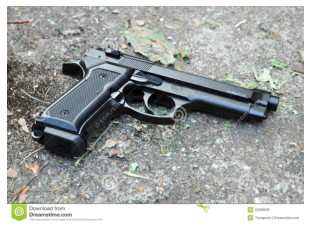

In [ ]:
from tensorflow.keras.preprocessing import image

path="/content/drive/MyDrive/Crime_Detection/gun.jpg"
img=image.load_img(path)
plt.imshow(img)
plt.axis("off")
img=img.resize((64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.array(x)
predictions = model.predict(images)
score = tf.nn.softmax(predictions)
print(f"The Image Is A {class_names[np.argmax(score)]} With A Probability Of {100*np.max(score):.2f}%.")